# Pendahuluan

Ini merupakan proses EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

In [2]:
# Import data
house = pd.read_csv("train_house.csv")
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [3]:
total = house.isnull().sum().sort_values(ascending=False)
persen = (house.isnull().sum()/len(house)).sort_values(ascending=False)
missing_data = pd.concat([total,persen], axis=1, keys=["total","persen"])
missing_data

,total,persen
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


### Menghilangkan kolom yang nilai NaN nya diatas 20%

In [4]:
x =[]
i=0
while missing_data["persen"][i] >= 0.2:
    x.append(str(missing_data.index[i]))
    i += 1

print(x)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


### Drop variabel NaN

In [5]:
house = house.drop(labels=x, axis=1)

### Untuk LotFrontAge menggunakan data modus untuk mengeliminasi nilai Nan

In [6]:
house["LotFrontage"] = house["LotFrontage"].fillna(value=house["LotFrontage"].mode()[0])
house["Electrical"] = house["Electrical"].fillna(value=house["Electrical"].mode()[0])
house["BsmtExposure"] = house["BsmtExposure"].fillna(value=house["BsmtExposure"].mode()[0])

### Melihat Nilai Null-nya saja pada kolom GarageType

In [7]:
house[pd.isnull(house["GarageType"])].head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,No,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
99,100,20,RL,77.0,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,128950
108,109,50,RM,85.0,8500,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,0,8,2007,WD,Normal,115000
125,126,190,RM,60.0,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,0,6,2006,WD,Normal,84500


### Karena ketika GarageType==NaN memperlihatkan GarageYrBlt==Nan dan GarageFinish==Nan, 
### sehingga pada baris yang nilai GarageType==NaN akan dihilangkan

In [8]:
house = house.drop(house[pd.isnull(house["GarageType"])].index)

### Karena ketika BsmtFinType2==NaN memperlihatkan BsmtQual==Nan dan BsmtCond==Nan, BsmtExposure==Nan, BsmtFinType1==Nan
### sehingga pada baris yang nilai BsmtFinType2==NaN akan dihilangkan

In [9]:
house = house.drop(house[pd.isnull(house["BsmtFinType2"])].index)

### Karena ketika MasVnrType==NaN memperlihatkan MasVnrArea==Nan
### sehingga pada baris yang nilai BsmtFinType2==NaN akan dihilangkan

In [10]:
house = house.drop(house[pd.isnull(house["MasVnrType"])].index)

# 1D Visualization 

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

Text(0.5, 1.0, 'House Utilities')

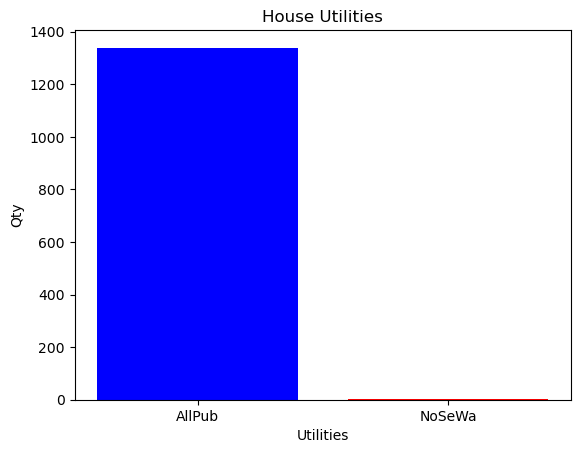

In [11]:
plt.bar(house["Utilities"].value_counts().index, house["Utilities"].value_counts(), color=['blue', 'red'])
plt.xlabel("Utilities")
plt.ylabel("Qty")
plt.title("House Utilities")

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Text(0.5, 1.0, 'House Style')

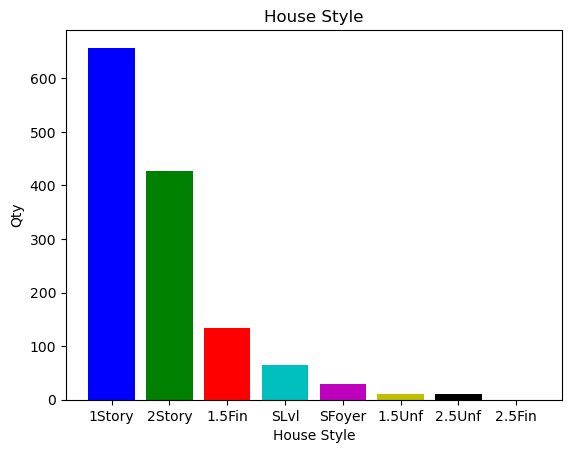

In [12]:
plt.bar(house["HouseStyle"].value_counts().index, house["HouseStyle"].value_counts(), color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])
plt.xlabel("House Style")
plt.ylabel("Qty")
plt.title("House Style")

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

Text(0.5, 1.0, 'Exterior Quality')

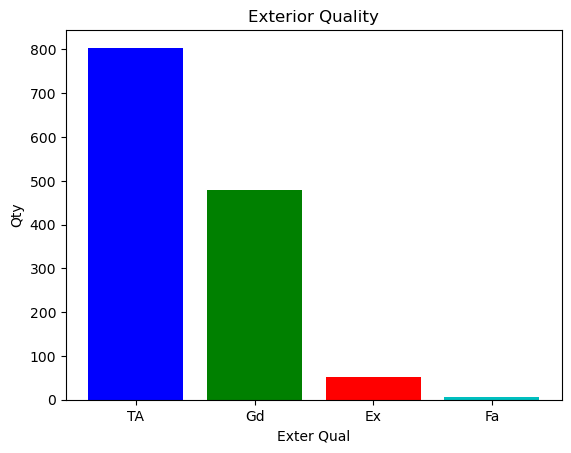

In [13]:
plt.bar(house["ExterQual"].value_counts().index, house["ExterQual"].value_counts(), color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])
plt.xlabel("Exter Qual")
plt.ylabel("Qty")
plt.title("Exterior Quality")

# **Analisis tentang variabel kategorikal**

Bila kita melihat grafik fasilitas, kita melihat bahwa semua data akan berpusat pada fasilitas yang lengkap dan hanya terdapat 1 data saja yang memiliki fasilitas hanya Gas dan Listrik. Lanjut dari style properti disini tertuju pada rumah dengan fasilitas 1 lantai menjadi primadona dari data yang terkumpulkan, namun fasilitas dengan 2 lantai baik yang sudah terisi maupun belum terisi mengiringi urutan selanjutnya. Untuk masalah eksterior, nampak bahwa nilai "Average/TA" disini memiliki responden diatas 50%, dilanjutkan untuk eksterior sendiri terlihat untuk responden "Good" memiliki andil yang cukup tinggi. Dari data-data tersebut, kita melihat bahwa responden memiliki kecerendungan untuk memiliki hunian/tempat tinggal yang sederhana 

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Median =  168500.0
Mean =  186751.69029850746
Std Dev =  78856.80291405173


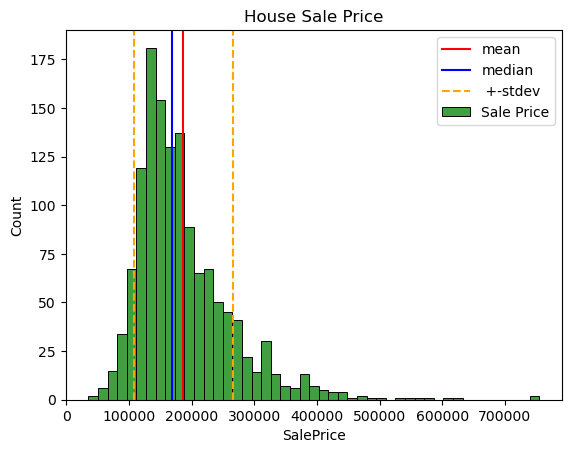

In [14]:
median_SalePrice = stats.median(house["SalePrice"])
mean_SalePrice = stats.mean(house["SalePrice"])
stdDev_SalePrice = stats.stdev(house["SalePrice"])
print("Median = ", median_SalePrice)
print("Mean = ", mean_SalePrice)
print("Std Dev = ", stdDev_SalePrice)


sns.histplot(data=house["SalePrice"], color='g', label="Sale Price")
plt.axvline(mean_SalePrice, color='r', label='mean')
plt.axvline(median_SalePrice, color='blue', label='median')
plt.axvline(mean_SalePrice-stdDev_SalePrice, color='orange', ls='--', label=' +-stdev')
plt.axvline(mean_SalePrice+stdDev_SalePrice, color='orange', ls='--')
plt.title("House Sale Price")
plt.legend()

## **Analisis tentang variabel `SalePrice`**

Melihat dari harga yang dicantumkan, terlihat bahwa angka ini berada di angka USD 186.751, dimana Mediannya berada di USD 168500, dan Standard deviasinya USD 78.856. Dari data tersebut terlihat bahwa rata-rata ini mendekati nilai mediannya, sehingga sebaran yang dimiliki oleh data ini cukup seimbang baik menuju sisi kiri ataupun kanan, namun memang dengan nilai standard deviasi yang berada hampir 50% dari nilai Mean ini menunjukan bahwa sebaran harga properti ini cukup luas, sehingga data bisa dikatakan tidak bertumpuk pada satu area yaitu di mean.

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Median =  1480.0
Mean =  1537.6559701492538
Std Dev =  520.2466270449379


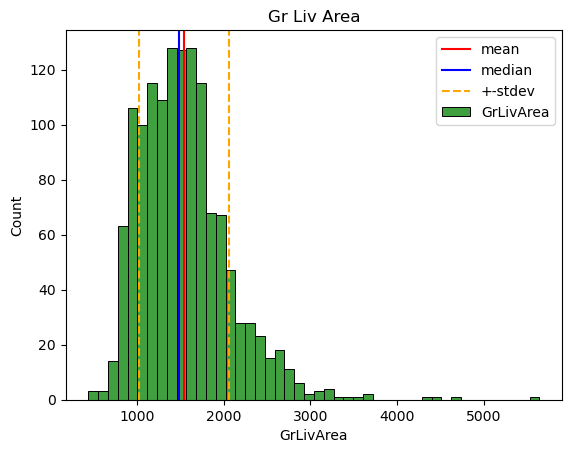

In [15]:
median_GrLivArea = stats.median(house["GrLivArea"])
mean_GrLivArea = stats.mean(house["GrLivArea"])
stdDev_GrLivArea = stats.stdev(house["GrLivArea"])
print("Median = ", median_GrLivArea)
print("Mean = ", mean_GrLivArea)
print("Std Dev = ", stdDev_GrLivArea)

sns.histplot(data=house["GrLivArea"], color='g', label="GrLivArea")
plt.axvline(mean_GrLivArea, color='r', label='mean')
plt.axvline(median_GrLivArea, color='blue', label='median')
plt.axvline(mean_GrLivArea-stdDev_GrLivArea, color='orange', label='+-stdev', ls='--')
plt.axvline(mean_GrLivArea+stdDev_GrLivArea, color='orange', ls='--')
plt.title("Gr Liv Area")
plt.legend()

## **Analisis tentang variabel `GrlivArea`**

Terlihat juga dari hasil pegolahan untuk besaran luas area tinggal di atas permukaan tanah ini, bahwa rumah ini memiliki luasan rata-rata diangka 1537 sqfeet, dengan nilai tengah 1480 sqfeet, dan std deviasi diangka 520 sqfeet. Serupa dengan harga properti, dimana rata-rata luasan area ini berada berdekatan dengan mediannya yaitu disekitar 1500 sqfeet, namun berbeda dengan nilai harga properti, disini terlihat bahwa standard deviasi yang terlihat ini masih berada diarea 30% dari Mean, ini menunjukan bila sebaran data dari luas area ini memiliki kecenderungan berkumpul pada area Median dan Mean. 

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Median =  484.0
Mean =  501.3537313432836
Std Dev =  186.64440703148298


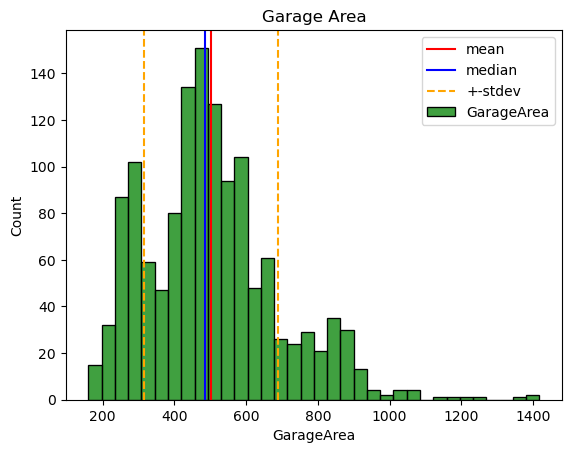

In [16]:
median_GarageArea = stats.median(house["GarageArea"])
mean_GarageArea = stats.mean(house["GarageArea"])
stdDev_GarageArea = stats.stdev(house["GarageArea"])
print("Median = ", median_GarageArea)
print("Mean = ", mean_GarageArea)
print("Std Dev = ", stdDev_GarageArea)

sns.histplot(data=house["GarageArea"], color='g', label="GarageArea")
plt.axvline(mean_GarageArea, color='r', label='mean')
plt.axvline(median_GarageArea, color='blue', label='median')
plt.axvline(mean_GarageArea-stdDev_GarageArea, color='orange', label='+-stdev', ls='--')
plt.axvline(mean_GarageArea+stdDev_GarageArea, color='orange', ls='--')
plt.title("Garage Area")
plt.legend()

## **Analisis tentang variabel `GarageArea`**

Untuk Garage Area disini didapatkan Mean sebesar 501 sqfeet, Median pada 484 sqfeet, dengan standard deviasi pada 186 sqfeet. Hasil ini memiliki keidentikan dengan besaran luas area dimana data bertumpuk mendekat pada nilai mean dan mediannya, terlihat pada nilai standard deviasi yang memiliki nilai diangka 30%an nilai Mean

## Pemrosesan Data Variabel Numerikal

##### Transformasi nilai log10 `Sale Price`

Median =  5.226599905207357
Mean =  5.239130459579921
Std Dev =  0.16354601407372074


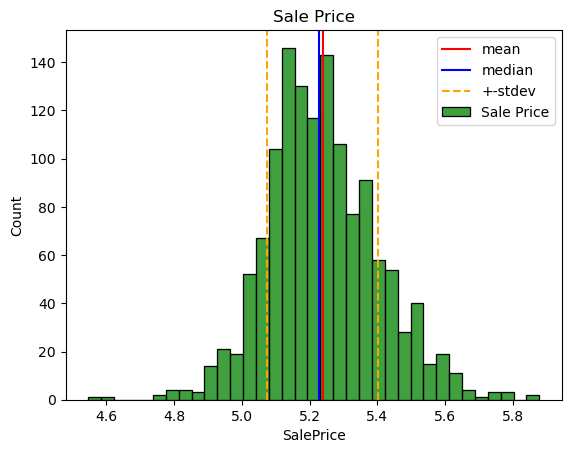

In [17]:

median_log10_SalePrice = stats.median(np.log10(house["SalePrice"]))
mean_log10_SalePrice = stats.mean(np.log10(house["SalePrice"]))
stdDev_log10_SalePrice = stats.stdev(np.log10(house["SalePrice"]))
print("Median = ", median_log10_SalePrice)
print("Mean = ", mean_log10_SalePrice)
print("Std Dev = ", stdDev_log10_SalePrice)

sns.histplot(data=np.log10(house["SalePrice"]), color='g', label="Sale Price")
plt.axvline(mean_log10_SalePrice, color='r', label='mean')
plt.axvline(median_log10_SalePrice, color='blue', label='median')
plt.axvline(mean_log10_SalePrice-stdDev_log10_SalePrice, color='orange', label='+-stdev', ls='--')
plt.axvline(mean_log10_SalePrice+stdDev_log10_SalePrice, color='orange', ls='--')
plt.title("Sale Price")
plt.legend()

#### Transformasi log-10 `GrLivArea`

Median =  3.1702616162590505
Mean =  3.164090722645037
Std Dev =  0.14001946322449038


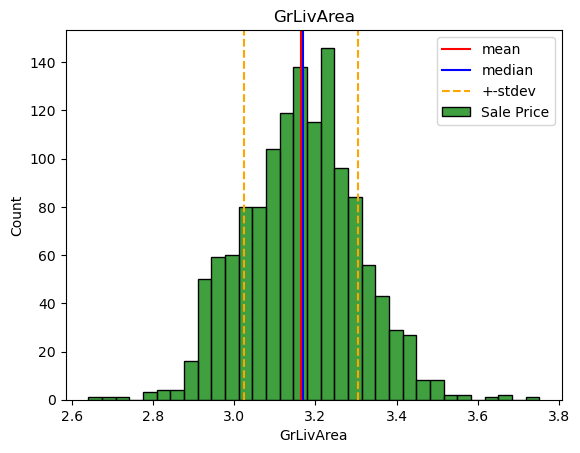

In [18]:
median_log10_GrLivArea = stats.median(np.log10(house["GrLivArea"]))
mean_log10_GrLivArea = stats.mean(np.log10(house["GrLivArea"]))
stdDev_log10_GrLivArea = stats.stdev(np.log10(house["GrLivArea"]))
print("Median = ", median_log10_GrLivArea)
print("Mean = ", mean_log10_GrLivArea)
print("Std Dev = ", stdDev_log10_GrLivArea)

sns.histplot(data=np.log10(house["GrLivArea"]), color='g', label="Sale Price")
plt.axvline(mean_log10_GrLivArea, color='r', label='mean')
plt.axvline(median_log10_GrLivArea, color='blue', label='median')
plt.axvline(mean_log10_GrLivArea-stdDev_log10_GrLivArea, color='orange', label='+-stdev', ls='--')
plt.axvline(mean_log10_GrLivArea+stdDev_log10_GrLivArea, color='orange', ls='--')
plt.title("GrLivArea")
plt.legend()

#### Menghilangkan nilai nol pada GarageArea

Median =  2.6848453616444123
Mean =  2.669857325245848
Std Dev =  0.16507248467223667


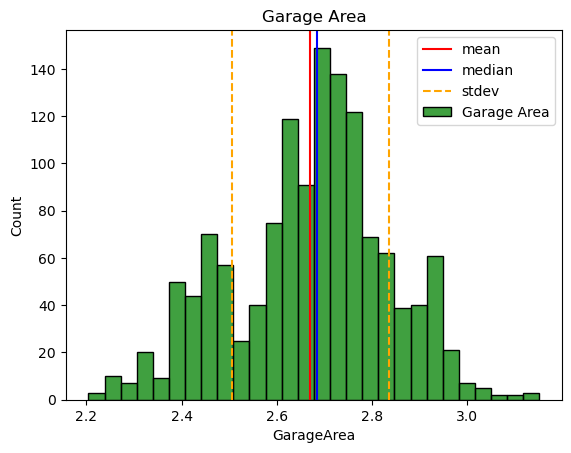

In [19]:
median_log10_GrLivArea = stats.median(np.log10(house["GarageArea"]))
mean_log10_GrLivArea = stats.mean(np.log10(house["GarageArea"]))
stdDev_log10_GrLivArea = stats.stdev(np.log10(house["GarageArea"]))
print("Median = ", median_log10_GrLivArea)
print("Mean = ", mean_log10_GrLivArea)
print("Std Dev = ", stdDev_log10_GrLivArea)

sns.histplot(data=np.log10(house["GarageArea"]), color='g', label="Garage Area")
plt.axvline(mean_log10_GrLivArea, color='r', label='mean')
plt.axvline(median_log10_GrLivArea, color='blue', label='median')
plt.axvline(mean_log10_GrLivArea-stdDev_log10_GrLivArea, color='orange', label='stdev', ls='--')
plt.axvline(mean_log10_GrLivArea+stdDev_log10_GrLivArea, color='orange', ls='--')
plt.title("Garage Area")
plt.legend()

# **Penjelasan dan analisis tentang pemrosesan data**

3 data utama pemrosesan ini yaitu SalePrice, GrLivArea, dan GarageArea divisualisasikan dalam bentuk grafik histogram dengan 2 cara, yaitu input langsung dan log10. 2 hal ini memberikan perbedaan dimana fokus untuk memberikan input langsung pada grafik awal yaitu untuk melihat sebaran data secara umum, sehingga kita akan lebih mengetahui seberapa imbasnya semua data tersebut pada sebuah grafik, lalu untuk visualisasi log10 kita melihat bahwa semua nilai Median, dan Mean cukup terpusat pada central grafik, dimana ini memudahkan untuk kita mempelajari sebaran data secara normalisasi, sehingga data log10 ini lebih mudah untuk mengetahui ada tidaknya data yang bernilai rendah, dan jauh dari Mean.

# 2D Visualization

# `GrLivArea` dengan `SalePrice`

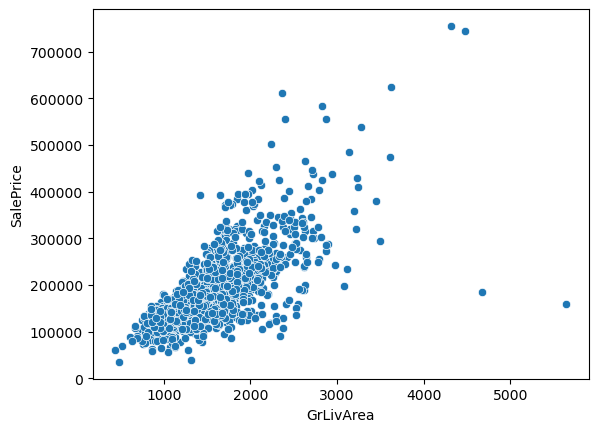

In [20]:
ax = sns.scatterplot(data=house[["GrLivArea","SalePrice"]], x="GrLivArea", y="SalePrice")

# `GarageArea` dengan `SalePrice`

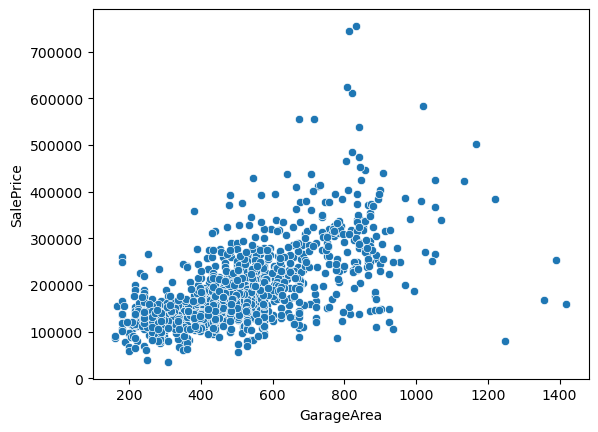

In [21]:
ax = sns.scatterplot(data=house[["GarageArea","SalePrice"]], x="GarageArea", y="SalePrice")

# **Hipotesis tentang hubungan antar-variabel**

Dengan melihat 2 grafik diatas dimana SalePrice berbanding dengan GrLivArea dan GarageArea disini memperlihatkan bahwa responden memliki dominasi pada rentang harga properti < USD 40000 dengan GrLivArea < 3000 sqfeet dan < 900 sqfeet. Rentang ini memiliki dominasi cukup banyak dengan masing-masing tervisualisasi pada grafik diatas. Bila dilihat secara sekilah, SalePrice sebagai fungsi dari GrLivArea ini cenderung memiliki gradiensi yang lebih besar, ketimbang SalePrice fungsi dari GarageArea, bisa disimpulkan bahwa Harga properti ini memiliki tingkat kenaikan yang tinggi bila luasan area properti tersebut besar, dan memiliki impact yang rendah saat garasi semakin luas.